In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclonesupdated/train.npy


In [2]:
cyclone_images = np.load('/kaggle/input/cyclonesupdated/train.npy')

In [3]:
import numpy as np
import random
import scipy
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from skimage.transform import resize
import tensorflow as tf
from PIL import Image
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

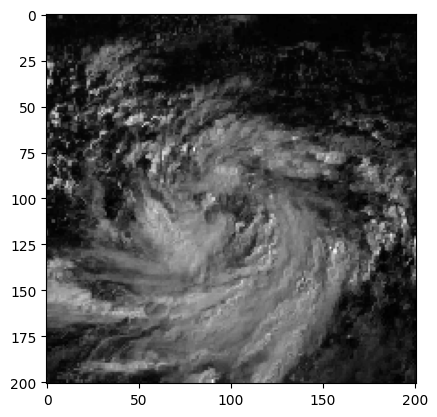

In [5]:
import matplotlib.pyplot as plt
plt.imshow(cyclone_images[25089], cmap = "gray")

In [6]:
#cyclone_images/=255.0
cyclone_images = np.array([resize(x, (200,200)) for x in cyclone_images])

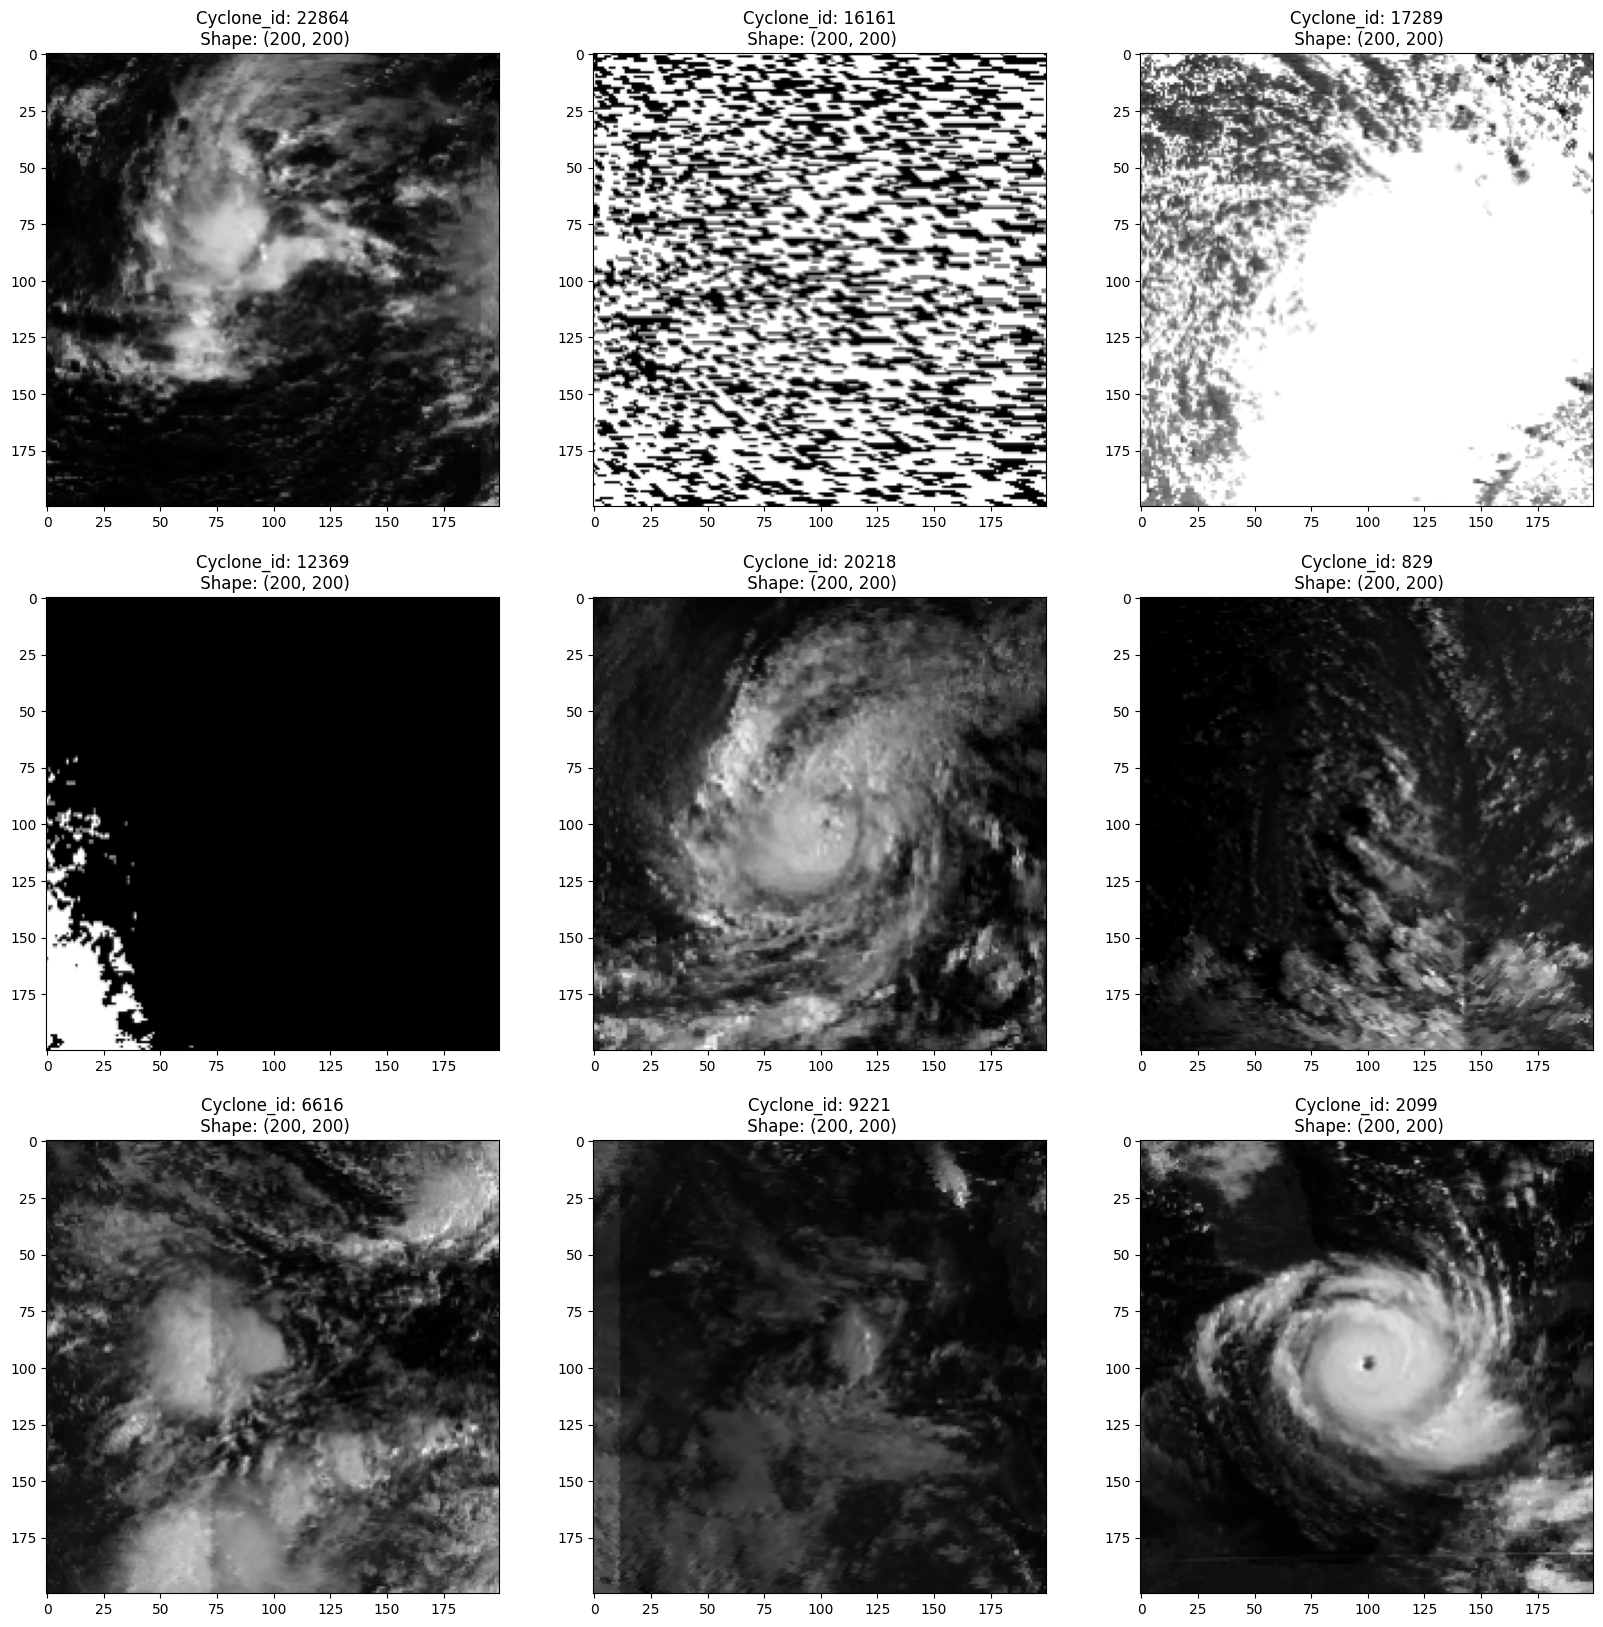

In [7]:
def plot_random_cyclone(images, sample = 9):
    random_image_indexes = random.sample(list(np.arange(0, len(images), 1)), sample)
    if (np.sqrt(sample) - int(np.sqrt(sample))) == 0:
        sqrt = int(np.sqrt(sample))
        Length, width = sqrt,sqrt
    else:
        Length, width = 1, sample
    fig = plt.figure(figsize = (20,20))
    for index, values in enumerate(random_image_indexes):
        plt.subplot(Length, width, index+1)
        plt.imshow(images[values], cmap = "gray")
        plt.title(f"Cyclone_id: {random_image_indexes[index]}\n Shape: {images[values].shape}")
plot_random_cyclone(cyclone_images, sample = 9)

In [8]:
True_Cyclones_Ids = [2908, 21596, 29069, 1110, 26944, 15931, 19658, 25923, 115, 4850, 9216, 1589, 12963, 6722, 26672, 17219, 18243, 7154, 19471, 21606, 29446, 12172, 3022,\
                    3022, 18484, 12532, 20570, 18440, 20313, 1430, 9252, 23419, 17759, 10275, 16229, 4991, 5815, 5240, 716, 20780, 22398, 10826, 3156, 20633, 22199, 17543, \
                    26787, 7288, 23425, 11582, 2088, 890, 19424, 11526, 22789, 5859, 22208, 8603, 4800, 19214, 7262, 24038, 10030, 580, 24737, 19125, 16064, 7708, 22554, \
                    10349, 6262, 29181, 15782, 546, 23197, 21542, 20023, 24453, 27183, 19268, 16004, 17530, 10861, 4730, 23452, 7902, 6047, 1114, 6895, 25011, 22339, \
                    23487, 26489, 27919, 19840, 19022, 1490, 3483, 10232, 5481, 16025, 24114, 6847, 16066, 7301, 20826, 728, 28078, 20064, 23825, 10828, 1531, 23683, 3258, \
                    1135, 25613, 23795, 1006, 27565, 8475, 18608, 28960, 15757, 25937, 3456, 20947, 5832, 23945, 865, 771, 19899, 3318, 12592, 5073, 10629, 3302, 3593, 26745, \
                    27766, 29101, 5851, 13068, 145, 4908, 520, 3811, 16067, 15964, 18581, 16513, 22764, 10018, 25237, 1857, 29023, 11468, 12377, 22006, 10946, 1868, 24720, \
                    2730, 4093, 2665, 4093, 2665, 21378, 1863, 1273, 7697, 16925, 24965, 2465, 16772, 18719, 4970, 3816, 23773, 13003, 7229, 25544, 9721, 5604, 29433, 17732, \
                    13719, 3091, 5911, 2863, 10157, 17949, 20877, 25333, 12962, 28141, 19512, 21114, 19904, 16106, 21090, 1845, 23158, 16243, 28623, 10186, 23848, 22323, 452, \
                    21006, 20761, 6193, 21584, 6193, 21584, 11568, 16027, 20425, 2798, 27028, 5068, 24933, 6684, 610, 23344, 17455, 20590, 9851, 4226, 28734, 26950, 23920, 9742, \
                    23920, 9742, 6158, 9109, 20335, 8932, 2935, 6074, 21823, 15976, 17618, 18425, 2160, 1562, 7936, 20327, 11063, 20080, 9753, 27152, 11105, 23478, 17679, 9532, \
                    17679, 9532, 18769, 13076, 10134, 3863, 10248, 29221, 4876, 2183, 11859, 18227, 13185, 3597, 21413, 15773, 7960, 18522, 5565, 296, 12911, 24488, 18440, 7554, \
                    8203, 14049, 7949, 22545, 5208, 253, 5544, 18612, 4507, 638, 10548, 17018, 10177, 20412, 16660, 10251, 3163, 11846, 18435, 22688, 2758, 1798, 1151, 9582, 21214, 
                    17405, 16080, 1732, 28740, 424, 4538, 10318, 7479, 12751, 11376, 7906, 18556, 25432, 22800, 28676, 9721, 9954, 18150, 28146, 16288, 6121, 8376, 35, 20036, 4741, \
                    27094, 4784, 20238, 15973, 22804, 8175, 18952, 10392, 11752, 21056, 23526, 6394, 21141, 24397, 23189, 28182, 13189, 25824, 11962, 7667, 3054, 1776, 23183, 11865, \
                    5315, 10675, 22545, 9996, 22931, 5198, 27923, 2193, 1154, 16083, 19772, 20344, 22103, 9307, 20371, 24915, 25259, 24915, 25259, 4951, 24175, 18787, 1088, 27956, \
                    25725, 8714, 29362, 13177, 26559, 22801, 24279, 1092, 20025, 24546, 2274, 188, 5431, 12572, 18623, 16851, 24119, 10137, 19398, 7165, 16506, 11966, 24142, 7352, \
                    25425, 23226, 24537, 9939, 18455, 7756, 18455, 7756, 12780, 9326, 5765, 11364, 7195, 23367, 19240, 25620, 10910, 4605, 21009, 264, 13266, 16925, 4052, 26223, 17494, \
                    12021, 12976, 9900, 22669, 12115, 10902, 7702, 4344, 25061, 29339, 8654, 5928, 3469, 11630, 22738, 16714, 12506, 10483, 9725, 12315, 19232, 21495, 29324, 21, 24006, 17267, \
                    17267, 9941, 22053, 1764, 8864, 357, 8166, 20723, 28705, 7620, 20614, 19321, 7403, 12219, 2052, 12219, 2052, 22777, 725, 6266, 27429, 22676, 13095, 1612, 28741, 16025, \
                    1448, 19329, 19987, 20560, 10483, 1662, 2574, 1197, 22235, 5163, 17887, 19213, 984, 1802, 17798, 27800, 17455, 16070, 21359, 28242, 29330, 6574, 7027, 10823, 3354, 19935, \
                    29365, 16989, 11518, 21183, 4145, 21639, 12436, 13336, 21304, 3668, 3134, 17642, 15771]

In [9]:
len(True_Cyclones_Ids)

518

In [10]:
Fake_Cyclones_Ids = [12577, 14151, 4570, 1090, 19233, 28458, 13252, 17962, 13595, 14980, 12029, 14521, 14931, 3929, 19042, 8501, 27176, 24690, 11451, 14271, 20317, 20757, \
                    12429, 15667, 7285, 14475, 3261, 23249, 1036, 7055, 1677, 22086, 19104, 8171, 19264, 8171, 19264, 28922, 20842, 26082, 24345, 6057, 10755, 27886, 6139, 28722, \
                    13987, 25852, 11759, 14407, 22645, 11659, 14353, 11131, 14718, 25308, 15588, 14967, 13884, 1161, 5949, 25994, 14285, 26458, 2711, 20691, 15568, 6197, 27259, \
                    11982, 8088, 23718, 27315, 24880, 18927, 18907, 13830, 13193, 3237, 25403, 13431, 4429, 7506, 11507, 6435, 25462, 14604, 28610, 23236, 13873, 7245, 8079, 18355, \
                    4859, 28822, 2777, 414, 12704, 27378, 3481, 15668, 27797, 27381, 25042, 3350, 14602, 6157, 19111, 17761, 19913, 7991, 11320, 27602, 28722, 15349, 7724, 27972, 816, \
                    816, 18621, 13646, 7963, 13719, 1125, 24451, 27447, 13721, 27110, 24621, 579, 3762, 13765, 4199, 11483, 5486, 12047, 5486, 12047, 25540, 3968, 6708, 13670, 13910, \
                    2103, 299, 23389, 6377, 26934, 23775, 26309, 21485, 20498, 14473, 14091, 25408, 14268, 7206, 1321, 13588, 18811, 6932, 13821, 22849, 4817, 13948, 9353, 6016, 3599, \
                    5273, 14175, 25344, 18457, 14206, 28610, 17409, 4098, 7279, 4098, 17049, 7279, 20926, 5926, 11234, 2775, 3503, 8513, 26666, 12661, 11276, 14217, 14217, 19433, 11744, \
                    14933, 12093, 13090, 18755, 17222, 27973, 21834, 3646, 7055, 28120, 25463, 26482, 28858, 3679, 20006, 14543, 14182, 19116, 14534, 13709, 5335, 26532, 19106, 6956, 21102, \
                    7360, 14102, 26779, 7970, 16156, 11374, 16155, 4028, 24891, 26602, 19634, 14107, 14549, 2457, 13436, 26048, 27968, 14489, 20280, 6560, 4172, 16750, 15084, 13578, 24183, \
                    12394, 20836, 6767, 279, 13921, 2285, 29062, 19969, 18531, 4252, 4036, 1375, 25172, 1561, 26835, 7355, 15158, 9813, 12833, 2467, 11037, 23349, 15436, 12967, 27272, 6526, \
                    799, 28279, 12593, 15514, 1933, 959, 28516, 13384, 14517, 6741, 13819, 17280, 1802, 7142, 20181, 15009, 13738, 25639, 15543, 9311, 2872, 27966, 11541, 27881, 13530, 14933, \
                    21209, 25532, 19099, 15134, 6039, 12434, 27883, 28904, 18210, 21814, 6725, 13543, 13387, 13791, 26293, 28858, 24377, 5355, 18801, 26820, 7259, 14712, 15088, 13156, 26113, \
                    13483, 18955, 28300, 27434, 14917, 21635, 11492, 25577, 8620, 14560, 2360, 14325, 12996, 21666, 5176, 2704, 9436, 15423, 27685, 19019, 954, 10564, 14534, 6222, 13609, 27395, \
                    3191, 16739, 542, 8055, 28094, 17092, 6883, 15477, 2886, 14768, 18546, 24545, 24527, 1902, 4961, 27125, 13794, 22307, 10960, 26942, 14498, 15303, 7941, 4394, 24840, 8286, 15515, \
                    15419, 25308, 6837, 26428, 15594, 2599, 6801, 8273, 28454, 14936, 21452, 18788, 2851, 6396, 5221, 21615, 23256, 3472,1046, 13784, 11561, 23459, 3945, 11053, 9259, 18604, 10976, \
                    5295, 7609, 15134, 10491, 10569, 24009, 10309, 26242, 15435, 20604, 8585, 14705, 11478, 13108, 3725, 12949, 13398, 7400, 5263, 18981, 13456, 4150, 29044, 13957, 29380, 5821, 12181, \
                    14649, 14141, 23348, 28115, 19444, 14518, 13783, 24615, 2070, 14209, 19452, 23895, 3363, 23709, 19281, 22377, 23174, 10943, 10697, 23701, 26473, 13526, 15069, 22408, 14936, 28922, \
                    28195, 22392, 3754, 14414, 21885, 23765, 18682, 2327, 27631, 29032, 1379, 609, 12202, 1051, 12429, 12429, 11122, 13580, 13281, 13017, 29359, 15470, 14499, 6216, 25161, 18549, 15540, \
                    23718, 29340, 6939, 14672, 19641, 2831, 13368, 8506, 7192, 18722, 11629, 11487, 14812, 13999, 29370, 15042, 8400, 13587, 27448, 13754, 15324]

In [11]:
len(Fake_Cyclones_Ids)

501

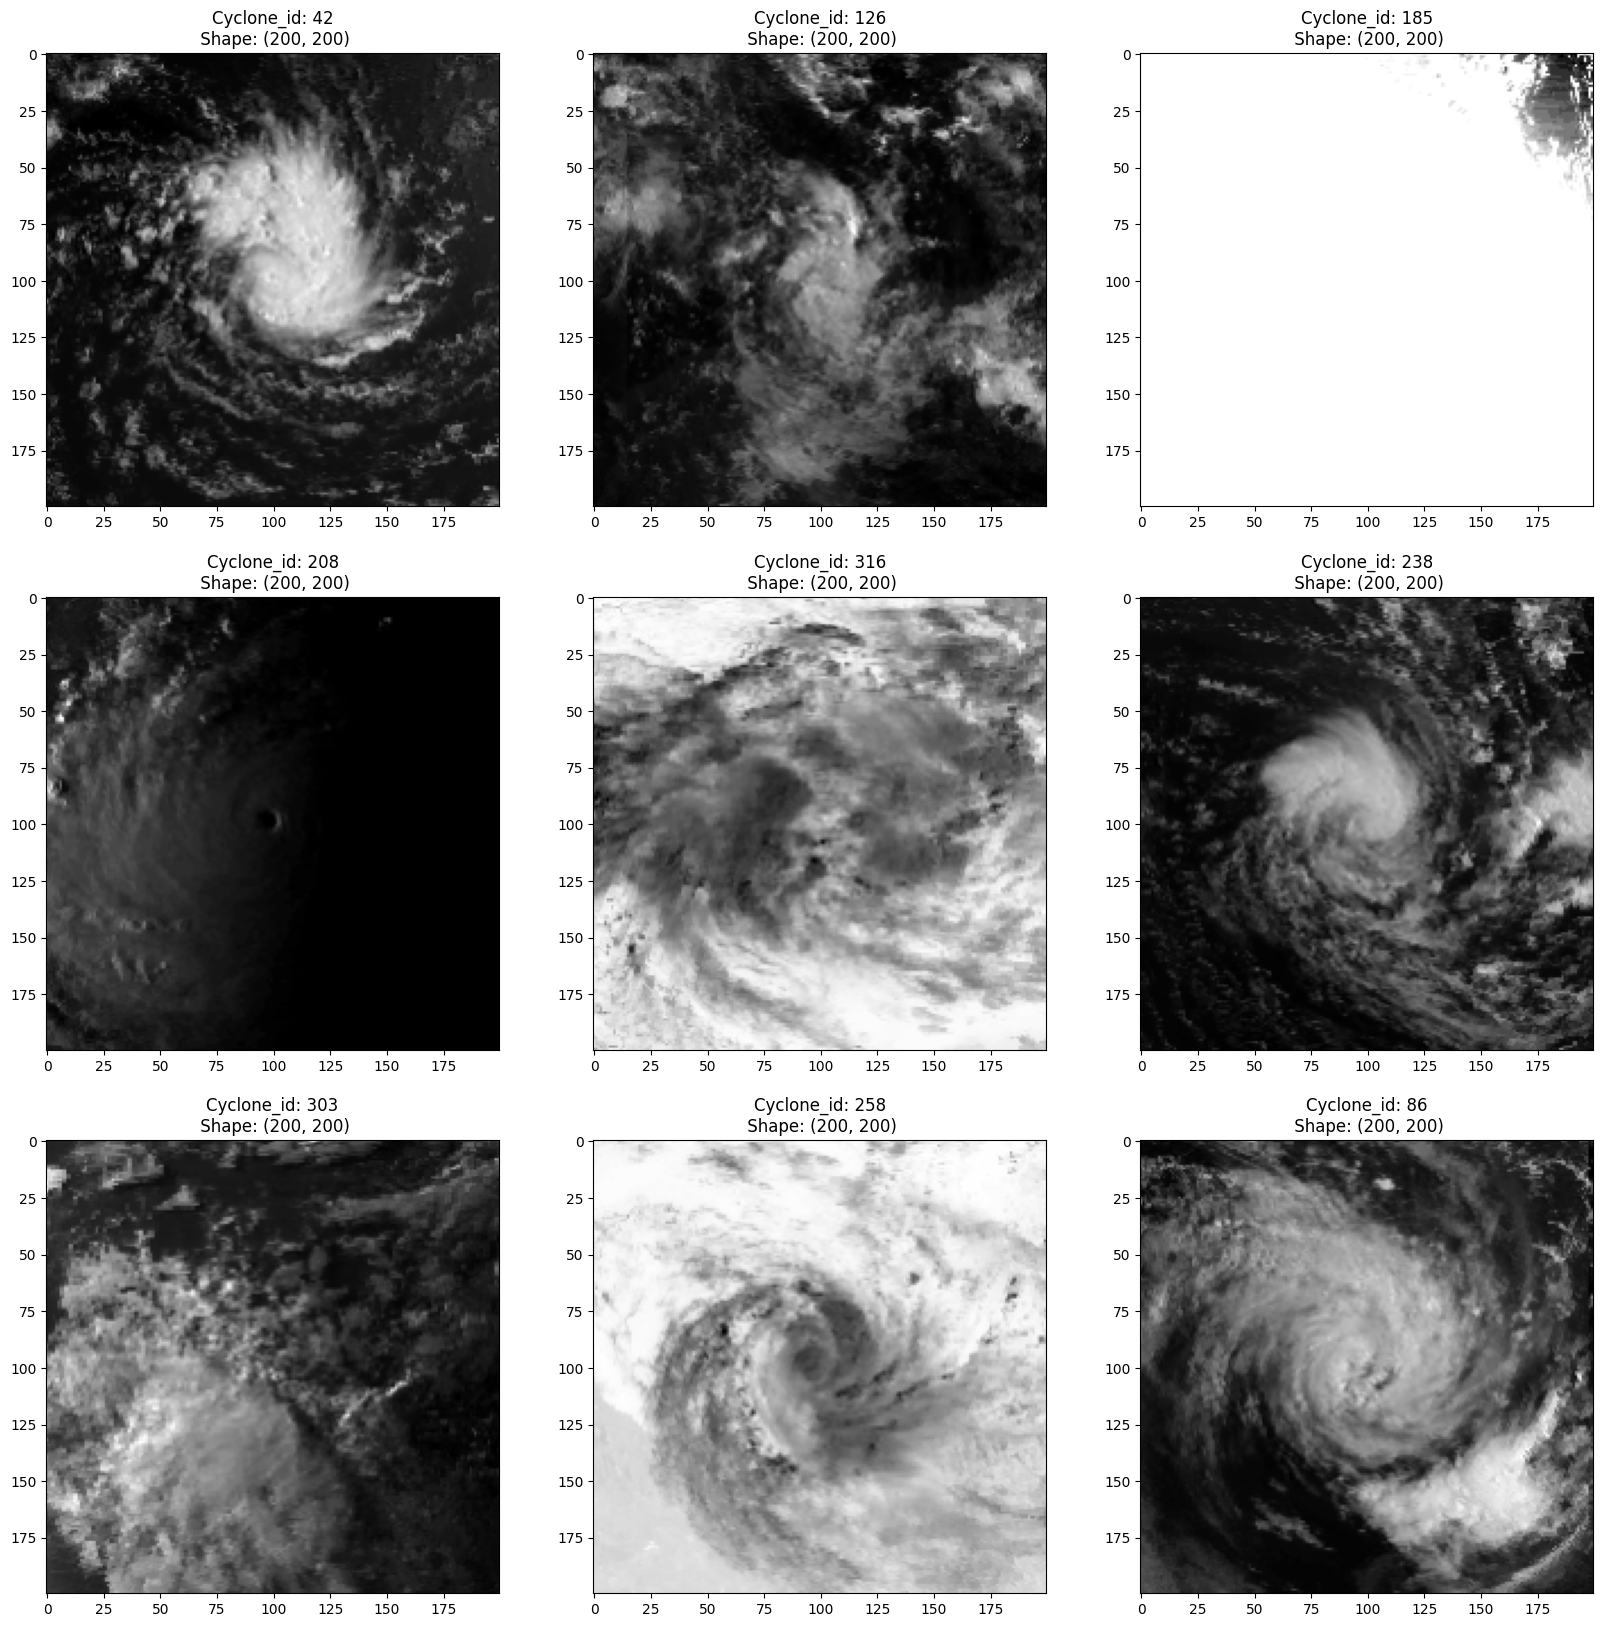

In [30]:
plot_random_cyclone(cyclone_images[True_Cyclones_Ids], sample = 9)

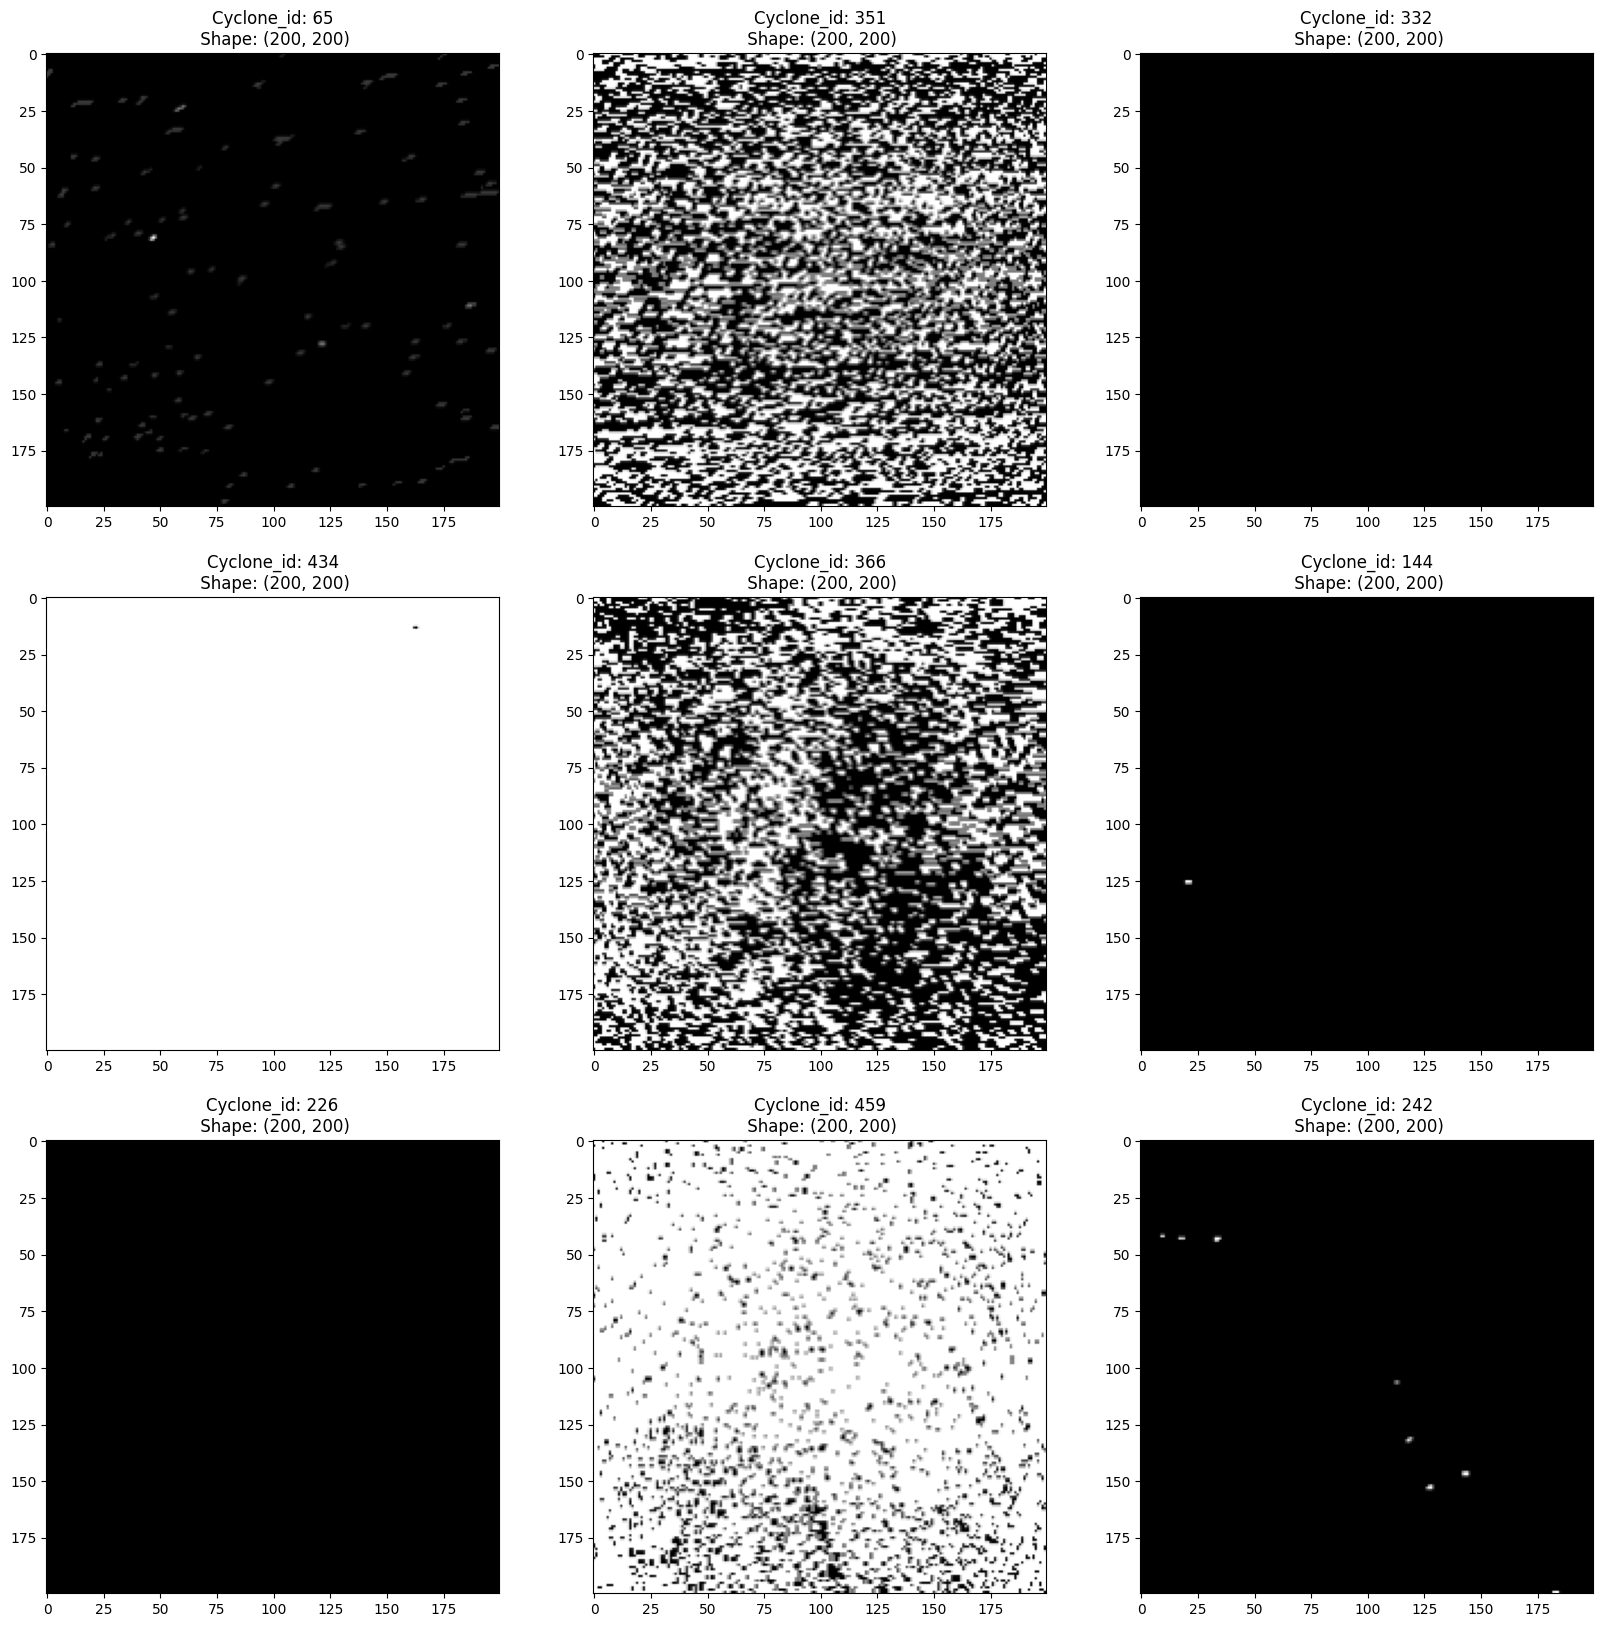

In [31]:
plot_random_cyclone(cyclone_images[Fake_Cyclones_Ids], sample = 9)

In [14]:
X_Dataset = np.concatenate([cyclone_images[True_Cyclones_Ids], cyclone_images[Fake_Cyclones_Ids]])
X_Dataset.shape

(1019, 200, 200)

In [15]:
Label_1 = np.ones(shape = (len(True_Cyclones_Ids,)))
Label_0 = np.zeros(shape = (len(Fake_Cyclones_Ids,)))
labels = np.concatenate([Label_1, Label_0])
labels.shape

(1019,)

In [16]:
class SEblock(tf.keras.layers.Layer):
    def __init__(self,units, bottleneck_units):
        super().__init__()
        
        # Define the SE Block Layers:
        self.Dense = tf.keras.layers.Dense(units, kernel_initializer = "glorot_uniform", activation = "sigmoid")
        self.Global_Average_Pool = tf.keras.layers.GlobalAveragePooling2D()
        self.Bottleneck = tf.keras.layers.Dense(bottleneck_units, kernel_initializer = "he_normal", activation = "selu")
        self.Reshape = tf.keras.layers.Reshape((1,1,units))
        
    def call(self, x):
        x = self.Global_Average_Pool(x)
        x = self.Bottleneck(x)
        x = self.Dense(x)
        x = self.Reshape(x)
        return x

In [17]:
class Residual_Block(tf.keras.layers.Layer):
    def __init__(self,filters, units, units_bottleneck):
        super().__init__()
        
        # Define Residual Block Layers
        self.Conv_1 = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "same", kernel_initializer= "he_normal")
        self.Conv_2 = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "same", kernel_initializer = "he_normal")
        #self.ffn_1 = tf.keras.layers.Dense(filters, activation = "selu", kernel_initializer = "lecun_normal", kernel_regularizer = "l1_l2")
        #self.ffn_2 = tf.keras.layers.Dense(filters, activation = "selu", kernel_initializer = "lecun_normal", kernel_regularizer = "l1_l2")
        self.Conv_Bypass = tf.keras.layers.Conv2D(filters = filters, kernel_size = (1,1), padding = "same", strides = 1, kernel_initializer = "he_normal")
        self.Leaky_Relu = tf.keras.layers.LeakyReLU()
        self.Max_Pooling = tf.keras.layers.MaxPool2D(2,2)
        self.Batch_Norm_1 = tf.keras.layers.BatchNormalization()
        self.Batch_Norm_2 = tf.keras.layers.BatchNormalization()
        self.Batch_Norm_3 = tf.keras.layers.BatchNormalization()
        self.Dropout_1 = tf.keras.layers.Dropout(0.3)
        self.Dropout_2 = tf.keras.layers.Dropout(0.3)
        self.Dropout_3 = tf.keras.layers.Dropout(0.3)
        self.Add_Layer = tf.keras.layers.Add()
        self.Multiply_Layer = tf.keras.layers.Multiply()
        self.SE_block = SEblock(units, units_bottleneck)
        
    def call(self, x):
        d = self.Conv_Bypass(x)
        d = self.Batch_Norm_1(d)
        
        x = self.Conv_1(x)
        x = self.Leaky_Relu(x)
        x = self.Batch_Norm_2(x)
        
        x = self.Conv_2(x)
        x = self.Batch_Norm_3(x)
        
        y = self.SE_block(x)
        y = self.Multiply_Layer([x,y])
        x = self.Add_Layer([y,d])
        
        x = self.Leaky_Relu(x)
        x = self.Max_Pooling(x)
        return x

In [32]:
def RE_Net():
    inputs = tf.keras.layers.Input(shape = (200,200,1))
    x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", kernel_initializer= "he_normal")(inputs)
    x = Residual_Block(filters = 32, units = 32, units_bottleneck = 4)(x)
    x = Residual_Block(filters = 64, units = 64, units_bottleneck = 16)(x)
    x = Residual_Block(filters = 128, units = 128, units_bottleneck = 32)(x)
    x = Residual_Block(filters = 128, units = 128, units_bottleneck = 32)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    out = tf.keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = "glorot_uniform")(x)
    Model = tf.keras.Model(inputs = inputs, outputs = out)
    
    return Model
SE_Net = RE_Net()
SE_Net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 32)      320       
                                                                 
 residual__block_4 (Residua  (None, 100, 100, 32)      20228     
 l_Block)                                                        
                                                                 
 residual__block_5 (Residua  (None, 50, 50, 64)        60432     
 l_Block)                                                        
                                                                 
 residual__block_6 (Residua  (None, 25, 25, 128)       239648    
 l_Block)                                                        
                                                           

In [33]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", min_delta = 1e-3, patience = 15)
reduce_learn_on_plateau = callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.80, patience = 5)

SE_Net.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate= 1e-3),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()]
)

In [34]:
history = SE_Net.fit(
    x = X_Dataset.reshape(-1,200,200,1), y = labels,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 64,
    callbacks = [early_stopping, reduce_learn_on_plateau],
)

Epoch 1/200
13/13 [==============================] - 29s 509ms/step - loss: 145.8589 - binary_accuracy: 0.6025 - precision_1: 0.7321 - auc_1: 0.6490 - val_loss: 94.6563 - val_binary_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_auc_1: 0.0000e+00 - lr: 0.0010
Epoch 2/200
13/13 [==============================] - 3s 242ms/step - loss: 66.5716 - binary_accuracy: 0.6785 - precision_1: 0.7819 - auc_1: 0.7532 - val_loss: 42.8603 - val_binary_accuracy: 0.4804 - val_precision_1: 0.0000e+00 - val_auc_1: 0.0000e+00 - lr: 0.0010
Epoch 3/200
13/13 [==============================] - 3s 243ms/step - loss: 35.7153 - binary_accuracy: 0.7448 - precision_1: 0.8312 - auc_1: 0.8010 - val_loss: 30.0976 - val_binary_accuracy: 0.4706 - val_precision_1: 0.0000e+00 - val_auc_1: 0.0000e+00 - lr: 0.0010
Epoch 4/200
13/13 [==============================] - 3s 243ms/step - loss: 28.0444 - binary_accuracy: 0.7620 - precision_1: 0.8279 - auc_1: 0.8236 - val_loss: 26.6138 - val_binary_accuracy: 0.4706 - val_pre

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: >

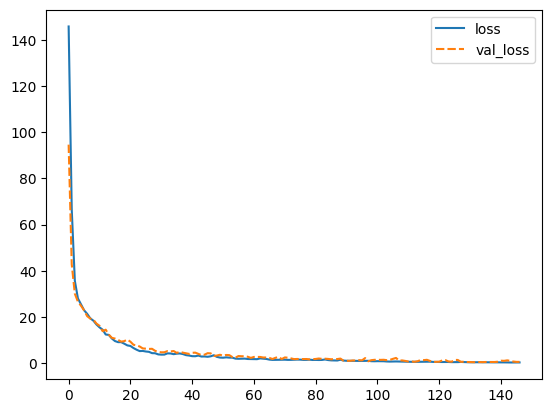

In [35]:
history_df = pd.DataFrame(history.history)
sns.lineplot(history_df.loc[:, ["loss", "val_loss"]])

In [36]:
SE_Net.evaluate(X_Dataset.reshape(-1,200,200,1), labels)

32/32 [==============================] - 1s 34ms/step - loss: 0.3490 - binary_accuracy: 0.9529 - precision_1: 0.9336 - auc_1: 0.9830


[0.3490477502346039,
 0.9528949856758118,
 0.9335793256759644,
 0.9830358028411865]

In [37]:
Predictions = SE_Net.predict(cyclone_images.reshape(-1,200,200,1))
Predictions.shape

921/921 [==============================] - 29s 31ms/step


(29466, 1)

In [38]:
np.unique(np.round(Predictions), return_counts = True)

(array([0., 1.], dtype=float32), array([ 9820, 19646]))

In [39]:
mask = [bool(x) for x in np.round(Predictions).reshape(-1,)]
cyclone_images[mask].shape

(19646, 200, 200)

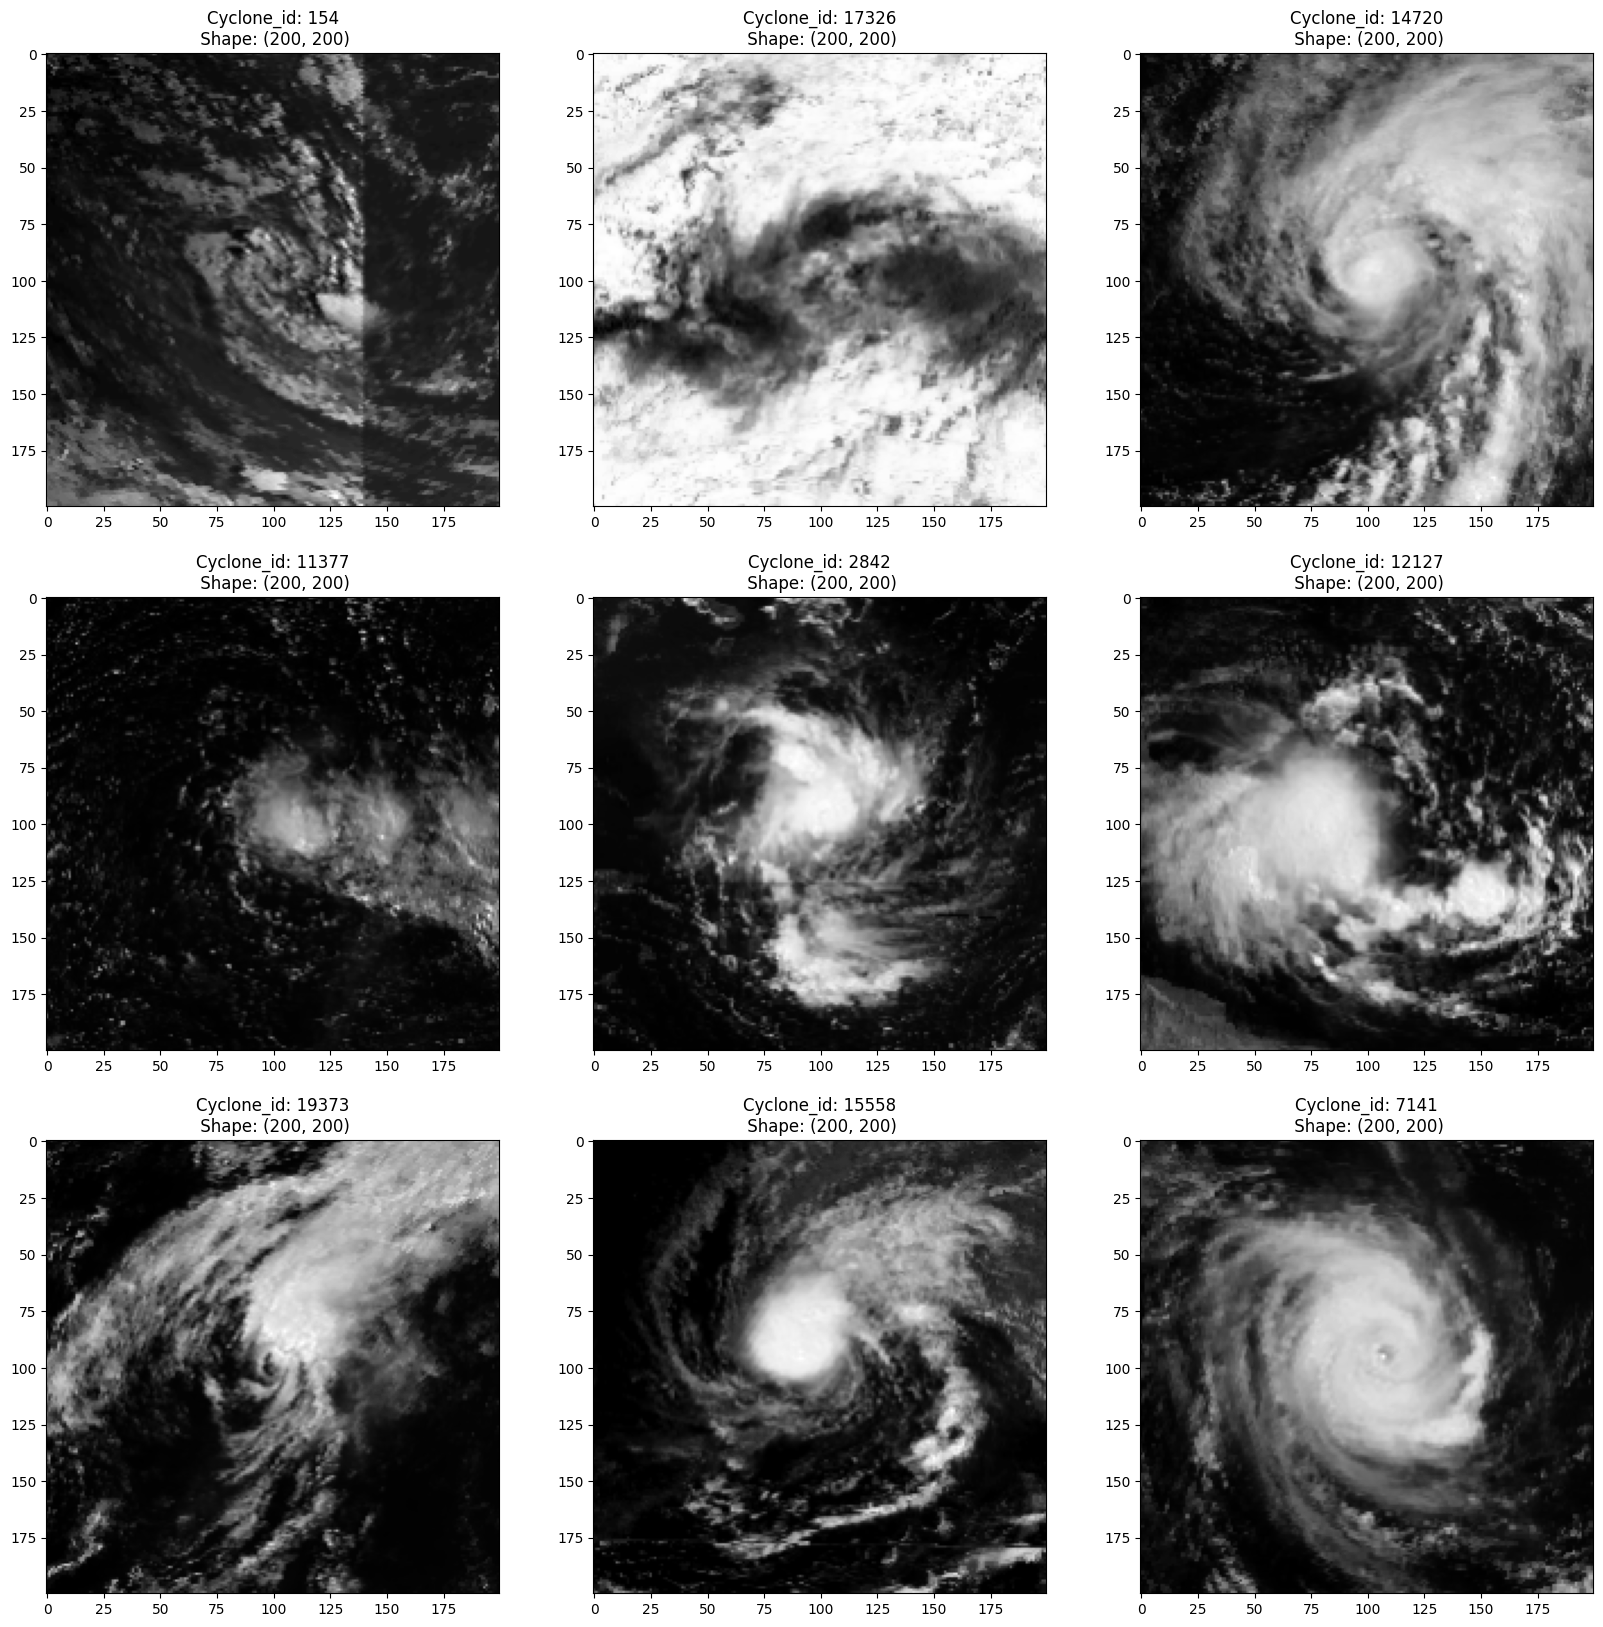

In [50]:
plot_random_cyclone(cyclone_images[mask], sample = 9)

In [51]:
SE_Net.save_weights("CycloneCleaner.h5")

In [ ]:
np.save("Cleaned_Cyclone_Images.npy", cyclone_images[mask])

In [ ]:
download_file("/kaggle/working/Cleaned_Cyclone_Images.npy", 'out')

In [ ]:
SE_Net.save("CleanCycloneModel.keras")

In [ ]:
SE_Net.save_weights("CleanCycloneModelWeights")

In [ ]:
np.round(Predictions)